In [2]:
import pgmpy.models
import pgmpy.inference
import networkx as nx
import pylab as plt

In [7]:
# Create a bayesian network
model = pgmpy.models.BayesianModel([('guest', 'monty'), ('prize', 'monty')])
model

In [21]:
# Define conditional probability distributions (CPD)
# Probability of guest selecting door 0, 1 and 2
cpd_guest = pgmpy.factors.discrete.TabularCPD('guest', 3, [[0.33], [0.33], [0.33]])
# Probability that the price is behind door 0, 1 and 2
cpd_prize = pgmpy.factors.discrete.TabularCPD('prize', 3, [[0.33], [0.33], [0.33]])

In [22]:
# Probability that Monty selects a door (0, 1, 2), when we know which door the guest has selected and we know were the prize is
cpd_monty = pgmpy.factors.discrete.TabularCPD('monty', 3, [[0, 0, 0, 0, 0.5, 1, 0, 1, 0.5], 
[0.5, 0, 1, 0, 0, 0, 1, 0, 0.5], 
[0.5, 1, 0, 1, 0.5, 0, 0, 0, 0]], 
evidence=['guest', 'prize'], 
evidence_card=[3, 3])

In [23]:
# Add CPDs to the network structure
model.add_cpds(cpd_guest, cpd_prize, cpd_monty)
# Check if the model is valid, throw an exception otherwise
model.check_model()

True

Probability distribution, P(Guest)
+----------+------+
| guest(0) | 0.33 |
+----------+------+
| guest(1) | 0.33 |
+----------+------+
| guest(2) | 0.33 |
+----------+------+

Probability distribution, P(Prize)
+----------+------+
| prize(0) | 0.33 |
+----------+------+
| prize(1) | 0.33 |
+----------+------+
| prize(2) | 0.33 |
+----------+------+

Joint probability distribution, P(Monty | Guest, Prize)
+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| guest    | guest(0) | guest(0) | guest(0) | guest(1) | guest(1) | guest(1) | guest(2) | guest(2) | guest(2) |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| prize    | prize(0) | prize(1) | prize(2) | prize(0) | prize(1) | prize(2) | prize(0) | prize(1) | prize(2) |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| monty(0) | 0.0      | 0.0     

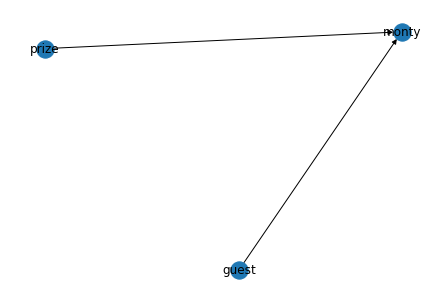

In [24]:
# Print probability distributions
print('Probability distribution, P(Guest)')
print(cpd_guest)
print()
print('Probability distribution, P(Prize)')
print(cpd_prize)
print()
print('Joint probability distribution, P(Monty | Guest, Prize)')
print(cpd_monty)
print()

# Plot the model
nx.draw(model, with_labels=True)

In [25]:
# Perform variable elimination for inference
# Variable elimination (VE) is a an exact inference algorithm in bayesian networks
infer = pgmpy.inference.VariableElimination(model)

# Calculate probabilites for doors including prize, the guest has selected door 0 and Monty has selected door 2

In [27]:
# Calculate probabilities for doors including prize, the guest has selected door 0 and Monty has selected door 2
posterior_probability = infer.query(['prize'], evidence={'guest': 0, 'monty': 2})
# Print posterior probability
print('Posterior probability, Guest(0) and Monty(2)')
print(posterior_probability)
print()

Finding Elimination Order: : : 0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:10, ?it/s]
0it [00:10, ?it/s]

Posterior probability, Guest(0) and Monty(2)
+----------+--------------+
| prize    |   phi(prize) |
+==========+==============+
| prize(0) |       0.3333 |
+----------+--------------+
| prize(1) |       0.6667 |
+----------+--------------+
| prize(2) |       0.0000 |
+----------+--------------+



https://github.com/pgmpy/pgmpy_notebook/blob/master/notebooks/9.%20Learning%20Bayesian%20Networks%20from%20Data.ipynb



https://www.programmersought.com/article/74205101984/

DATA: https://github.com/frealter/wncg/tree/master/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E5%AE%9E%E6%88%98/%E8%B4%9D%E5%8F%B6%E6%96%AF%E7%BD%91%E7%BB%9C

- Run model - display inference
- Output, graphs, plots of the model

- Merge the data, shuffle into train & test data: 10-fold cross validation
- Beautify the plots
- Add comments to the code